In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
trade = pd.read_csv('trade.csv')
quote = pd.read_csv('quote.csv')

trade['BJtime'] = pd.to_datetime(trade['recv_time'],unit = 'us')+pd.DateOffset(hours=8)
quote['BJtime'] = pd.to_datetime(quote['recv_time'],unit = 'us')+pd.DateOffset(hours=8)

# Q2

In [29]:
open_30_min = trade[(trade['BJtime'] >= pd.to_datetime('2020-10-09 09:30')) & (trade['BJtime'] <= pd.to_datetime('2020-10-09 10:00'))]
open_30_min.sort_values(by = 'trade_qty', ascending= False).iloc[0,:]

recv_time                1602208353241894
symbol                          002610.SZ
trade_price                          2.65
trade_qty                          872600
BJtime         2020-10-09 09:52:33.241894
Name: 281558, dtype: object

# Q3

In [46]:
start = pd.to_datetime('2020-10-09 09:30')
end = pd.to_datetime('2020-10-09 15:00')
diff = pd.DateOffset(hours=0.5)

largest_trade_table = pd.DataFrame(columns = ['start','end','symbol','volume'])
while start <= end - diff:
    trade_30_min = trade[(trade['BJtime'] >= start) & (trade['BJtime'] <= start + diff)]
    trade_30_min = trade_30_min.sort_values(by = 'trade_qty', ascending= False)
    if (len(trade_30_min) > 0):
        largest_trade_table = largest_trade_table.append({'start':start, 'end':start + diff, 'symbol':trade_30_min.iloc[0,1], 'volume':trade_30_min.iloc[0,3]},ignore_index=True)
    start += pd.DateOffset(hours=0.5)
largest_trade_table

,start,end,symbol,volume
0,2020-10-09 09:30:00,2020-10-09 10:00:00,002610.SZ,872600
1,2020-10-09 10:00:00,2020-10-09 10:30:00,002466.SZ,865700
2,2020-10-09 10:30:00,2020-10-09 11:00:00,002610.SZ,400000
3,2020-10-09 11:00:00,2020-10-09 11:30:00,002610.SZ,834700
4,2020-10-09 13:00:00,2020-10-09 13:30:00,002610.SZ,355000
5,2020-10-09 13:30:00,2020-10-09 14:00:00,002610.SZ,166591
6,2020-10-09 14:00:00,2020-10-09 14:30:00,002429.SZ,294600
7,2020-10-09 14:30:00,2020-10-09 15:00:00,002126.SZ,261200


# Q4

000021.SZ


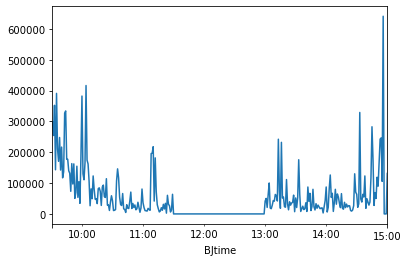

002610.SZ


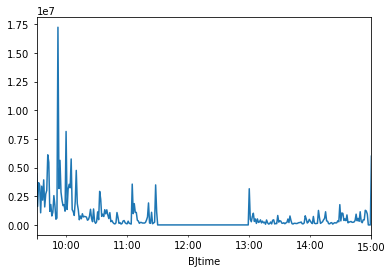

002202.SZ


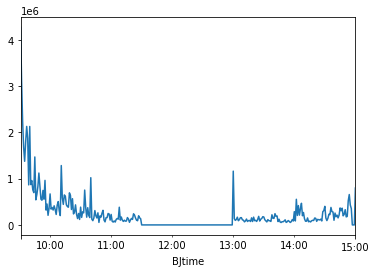

000338.SZ


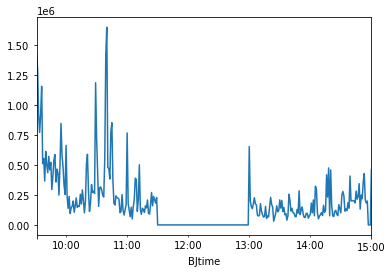

000625.SZ


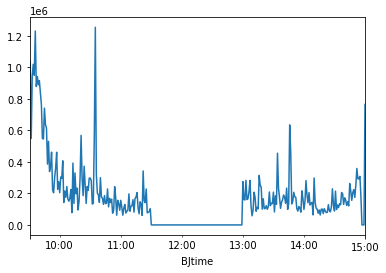

In [75]:
total_trade = trade.groupby('symbol').agg({'trade_qty':'sum'}).sort_values(by = 'trade_qty',ascending = False)
total_trade_top_5 = total_trade.iloc[:5,:].index.tolist()
for sec in total_trade_top_5:
    print(sec)
    sec_data = trade[trade['symbol'] == sec]
    sec_data = sec_data[sec_data['BJtime'] >= pd.to_datetime('2020-10-09 09:30')]
    # TODO 有一些人在9点25到9点半之间乱报价 我觉得拿掉比较好
    sec_data.set_index('BJtime',drop=True)['trade_qty'].resample('1T').sum()[1:].plot()
    plt.show()

# Q5

In [80]:
shenzhen_tech = quote[quote['symbol'] == '000021.SZ']
(shenzhen_tech['ask_price'] - shenzhen_tech['bid_price']).mean()

0.01600041368423851

# Q6

In [86]:
merged = pd.merge(quote,trade, on = ['BJtime','symbol'])
#TODO inner join数据量变少了 你注意一下
(merged['ask_price'] - merged['bid_price']).median()

0.010000000000000231